In [27]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset
%matplotlib inline

In [57]:
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_dataset()
num_px = train_set_x.shape[1]

In [29]:
# 向量化
train_set_x = train_set_x.reshape(train_set_x.shape[0], -1).T
test_set_x = test_set_x.reshape(test_set_x.shape[0], -1).T
# 标准化
train_set_x = train_set_x/255
test_set_x = test_set_x/255

In [30]:
# 激活函数sigmoid
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

In [31]:
# 初始化w向量和b向量
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert w.shape == (dim, 1)
    assert isinstance(b, float) or isinstance(b, int)
    return w, b

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [46]:
# 向前传播
# 传入w向量，b向量，训练数据X、Y矩阵
def propagate(w, b, X, Y):
    m = X.shape[1]
    # 计算激活值
    A = sigmoid(np.dot(w.T,X) + b)
    # 计算损失值
    cost = (-1.0/m)*(np.sum(Y*np.log(A) + (1.0-Y)*np.log(1.0-A)))
    # 计算梯度，w向量导数和d向量导数
    dw = (1.0/m)*np.dot(X,((A-Y).T))
    db = (1.0/m)*(np.sum(A-Y))
    return dw,db, cost

In [33]:
def optimize(w, b, X, Y, training_frequency, learn_rate):
    costs = []
    for i in range(training_frequency):
        dw,db, cost = propagate(w, b, X, Y)
        w = w-(dw*learn_rate)
        b = b-(db*learn_rate)
        if i % 100 == 0:
            costs.append(cost)
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return w,b,dw,db,costs

In [34]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    # 此处的结果是一个概率
    A = sigmoid(np.dot(w.T, X) + b)
    # 将改了转为实际的结果
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:    
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    return Y_prediction

In [48]:
def model(X_train, Y_train, X_test, Y_test, training_frequency = 2000, learning_rate = 0.5):
    w,b = initialize_with_zeros(X_train.shape[0])
    w,b,dw,db,costs = optimize(w,b,X_train, Y_train,training_frequency, learning_rate)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": training_frequency}
    return d

In [49]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, training_frequency = 2000, learning_rate = 0.005)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


(64, 64, 3)
y = 1.0, your algorithm predicts a "cat" picture.


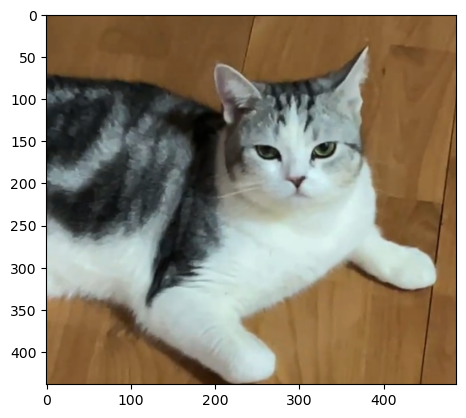

In [69]:
## START CODE HERE ## (PUT YOUR IMAGE NAME)
my_image = "my_image3.jpg"  # change this to the name of your image file
## END CODE HERE ##

import imageio
from skimage.transform import resize

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = imageio.v2.imread(fname)
if image.shape[2] == 4:
    image = image[:, :, :3]
image_resized = resize(image, (num_px, num_px))
print(image_resized.shape)
image_resized = image_resized.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], image_resized)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
